In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

“A large-scale analysis of racial disparities in police stops across the United States” by Pierson et al.
[arxiv](https://arxiv.org/pdf/1706.05678&hl=en&sa=X&scisig=AAGBfm2zvR6alec2VLGC4MM7XEKygb6MoQ&nossl=1&oi=scholarr)
Fortunately, we live during the era of Open Science, so [data](https://openpolicing.stanford.edu/data/) is open, [analysis](https://openpolicing.stanford.edu/tutorials/) is open and presented in a form of tutorial, but that is in R
So lets rewrite everything in Python!

For educational purposes we will work with Philadelphia and Pennsylvania only available at [link](https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_pa_philadelphia_2020_04_01.csv.zip)

In [3]:
df = pd.read_csv("pa_philadelphia_2020_04_01.csv")
df.head()

C:\Users\wirze\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,01:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,01:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False


In [4]:
df.describe()

,lat,lng,district,subject_age
count,1.760399e+06,1.760399e+06,1.865095e+06,1.860537e+06
mean,3.999082e+01,-7.515991e+01,1.897446e+01,3.482904e+01
std,4.300670e-02,5.408462e-02,1.055422e+01,1.333661e+01
min,3.987503e+01,-7.527569e+01,1.000000e+00,1.000000e+01
25%,3.995843e+01,-7.519555e+01,1.200000e+01,2.400000e+01
50%,3.999226e+01,-7.516022e+01,1.800000e+01,3.100000e+01
75%,4.002475e+01,-7.513019e+01,2.500000e+01,4.400000e+01
max,4.013789e+01,-7.495771e+01,7.700000e+01,1.100000e+02


use your print_uniques from recup2

write at least two sentences describing the data
Hint: [readme available at github](https://github.com/stanford-policylab/opp/blob/master/data_readme.md)
Our target variable are search_conducted and frisk_performed, they indicate *"whether any type of search was conducted, i.e. driver, passenger, vehicle. Frisks are excluded where the department has provided resolution on both"*
This data is about ...
For me the most interesting available variables are ...
Philadelphia is special because ...

## analysis
Authors defined **hit_rate**, as the the “proportion of searches that successfully turn up contraband.”

Calculate average contraband_found rate by race of a subject only among those who were searched

In [5]:
# df[df['search_conducted'] == True]#####

,contraband_found
subject_race,
asian/pacific islander,0.222518
black,0.275279
hispanic,0.340550
other,0.133690
unknown,0.230508
white,0.292944


among those who were searched,
for each district and by subject race\ethnicity
calculate average percentage of contraband found
reset indexes for christ sake

In [6]:
df_ht = df[df['search_conducted'] == True]#.\
    ##groupby###

,subject_race,district,hit_rate
0,asian/pacific islander,1.0,0.154930
1,asian/pacific islander,2.0,0.412698
2,asian/pacific islander,3.0,0.226337
3,asian/pacific islander,5.0,0.333333
4,asian/pacific islander,6.0,0.200000
...,...,...,...
125,white,25.0,0.389138
126,white,26.0,0.256630
127,white,35.0,0.279373
128,white,39.0,0.395349


transform data into wide format
there are nice [gifs](https://github.com/gadenbuie/tidyexplain) for better understanding
check them out

pandas function is [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

we want to have districts in each row
and and hit rates for each race
also lets filter out all other races except for black, white, and hispanic people

rename column white as white_hit_rate

In [28]:
df_ht_wide = ###########
#########
#######
#######

district  hit_rate                         
subject_race district     black  hispanic white_hit_rate
0                 1.0  0.240082  0.272727       0.277188
1                 2.0  0.351217  0.311304       0.320631
2                 3.0  0.293540  0.186495       0.238508
3                 5.0  0.204420  0.400000       0.201058
4                 6.0  0.233895  0.231707       0.174118
5                 7.0  0.219355  0.181818       0.201571
6                 8.0  0.203209  0.238095       0.214552
7                 9.0  0.214390  0.180556       0.182320
8                12.0  0.242017  0.301370       0.232365
9                14.0  0.228657  0.140000       0.225131
10               15.0  0.294636  0.254000       0.205858
11               16.0  0.305902  0.185185       0.321429
12               17.0  0.276910  0.256637       0.287425
13               18.0  0.238672  0.212121       0.238908
14               19.0  0.340197  0.243243       0.429952
15               22.0  0.242911  0.217877       0.233668
16               24.0  0.420622  0.447331       0.429279
17               25.0  0.296432  0.331142       0.389138
18               26.0  0.342292  0.321884       0.256630
19               35.0  0.242723  0.222445       0.279373
20               39.0  0.295119  0.226415       0.395349
21               77.0  0.041940  0.056604       0.020625

sometimes double headings of columns could screw us
thb, i am scared of them, so lets drop them
that a tiny hack that will help us later

In [29]:
df_ht_wide.columns = df_ht_wide.columns.droplevel(0)
df_ht_wide

subject_race,district,black,hispanic,white_hit_rate
0,1.0,0.240082,0.272727,0.277188
1,2.0,0.351217,0.311304,0.320631
2,3.0,0.293540,0.186495,0.238508
3,5.0,0.204420,0.400000,0.201058
4,6.0,0.233895,0.231707,0.174118
5,7.0,0.219355,0.181818,0.201571
6,8.0,0.203209,0.238095,0.214552
7,9.0,0.214390,0.180556,0.182320
8,12.0,0.242017,0.301370,0.232365
9,14.0,0.228657,0.140000,0.225131


And from wide format back to long one,
but not so long
we want to gather only minorities, and compare them against white

so long dataframe will have two rows for each district with black and hispanic as subject race
and new value name as minority_hit_rate

use function [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) for this transformation

In [103]:
df_ht_long = df_ht_wide.\
    melt(id_vars = ['district', 'white_hit_rate']##
#####
####
####

,district,white_hit_rate,subject_race,minority_hit_rate
0,1.0,0.277188,black,0.240082
22,1.0,0.277188,hispanic,0.272727
1,2.0,0.320631,black,0.351217
23,2.0,0.320631,hispanic,0.311304
2,3.0,0.238508,black,0.293540
24,3.0,0.238508,hispanic,0.186495
3,5.0,0.201058,black,0.204420
25,5.0,0.201058,hispanic,0.400000
4,6.0,0.174118,black,0.233895
26,6.0,0.174118,hispanic,0.231707


draw both minorities simultaneously with a sns scatter plot

<AxesSubplot:xlabel='white_hit_rate', ylabel='minority_hit_rate'>

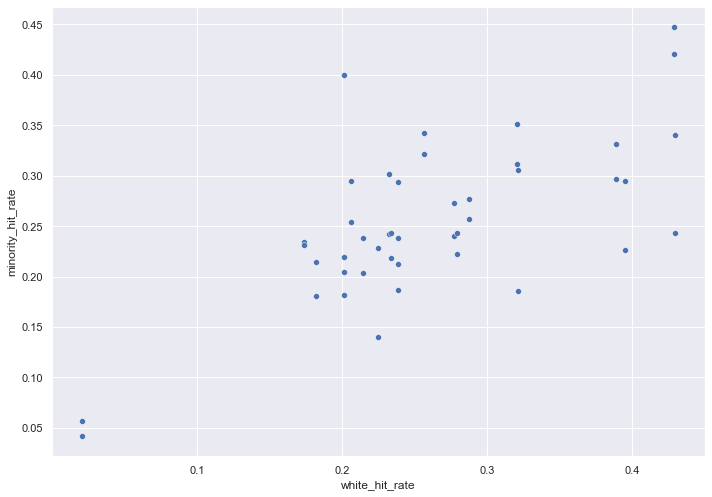

In [46]:
sns.scatterplot#####

take a look at sns facet grid, or [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), try to reproduce the graph from the article

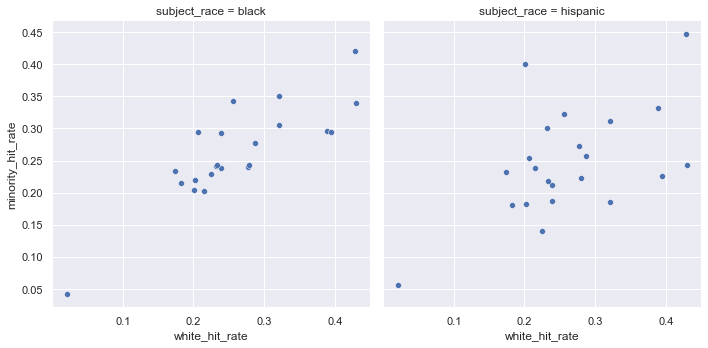

In [45]:
sns.relplot######

In [49]:
from matplotlib import pyplot as plt

spend the next 10 minutes googling how to draw diagonal line

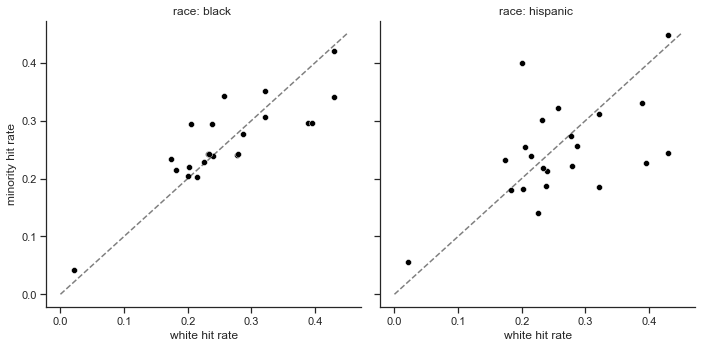

In [88]:
sns.set_style("ticks")
g = sns.relplot(data=df_ht_long, x="white_hit_rate",
                y="minority_hit_rate",
                col="subject_race",
                color = 'black',
                # marker = '$\circ$'
                )

(g.set_axis_labels("white hit rate", "minority hit rate")
 .set_titles("race: {col_name} "))

xx = np.linspace(0, 0.45, 100)
yy = xx
for ax in g.axes.flat:
    ax.plot(xx,yy, color = 'black', linestyle = '--', alpha = 0.5)

Now try to make size each of the points change by number of searches

In [90]:
df_ht_2 = df[df['search_conducted'] == True].\
    groupby(['subject_race', 'district']).\
    agg(n=('contraband_found', 'size')).\
    reset_index()
df_ht_2

,subject_race,district,n
0,asian/pacific islander,1.0,71
1,asian/pacific islander,2.0,63
2,asian/pacific islander,3.0,243
3,asian/pacific islander,5.0,3
4,asian/pacific islander,6.0,40
...,...,...,...
125,white,25.0,2228
126,white,26.0,1282
127,white,35.0,383
128,white,39.0,258


In [122]:
df_ht_wide_2 = df_ht_2[df_ht_2['subject_race'].isin(["black", "white", "hispanic"])].\
    pivot_table(values = ['n'], index = ['district'], columns=['subject_race'], fill_value=0).\
    rename({'white':'num_white_searches'}, axis = 'columns').\
    reset_index(level='district', col_level=1, col_fill='district')
df_ht_wide_2

district     n                            
subject_race district black hispanic num_white_searches
0                 1.0  1462       66                754
1                 2.0  2013      575                761
2                 3.0  1223      311               1501
3                 5.0   181       20                378
4                 6.0  1009      164                425
5                 7.0   155       44                382
6                 8.0   187       84                536
7                 9.0  1376       72                362
8                12.0  6169       73                241
9                14.0  8703      100                191
10               15.0  4083     1000               2424
11               16.0  2406       27                 84
12               17.0  3586      113                501
13               18.0  6444       66                293
14               19.0  8304       74                414
15               22.0  7723      179                398
16               24.0  4151     4272               5451
17               25.0  4652     5019               2228
18               26.0  1265     1019               1282
19               35.0  8520      499                383
20               39.0  5286      106                258
21               77.0   763      159               1600

In [123]:
df_ht_wide_2.columns = df_ht_wide_2.columns.droplevel(0)
df_ht_wide_2

subject_race,district,black,hispanic,num_white_searches
0,1.0,1462,66,754
1,2.0,2013,575,761
2,3.0,1223,311,1501
3,5.0,181,20,378
4,6.0,1009,164,425
5,7.0,155,44,382
6,8.0,187,84,536
7,9.0,1376,72,362
8,12.0,6169,73,241
9,14.0,8703,100,191


In [125]:
df_ht_long_2 = df_ht_wide_2.melt(id_vars = ['district','num_white_searches'],
         value_vars = ['black', 'hispanic'],
         value_name = 'num_minority_searches')
    # sort_values(by=['district'])
df_ht_long_2['num_searches'] = df_ht_long_2.num_minority_searches + df_ht_long_2.num_white_searches
df_ht_long_2

,district,num_white_searches,subject_race,num_minority_searches,num_searches
0,1.0,754,black,1462,2216
1,2.0,761,black,2013,2774
2,3.0,1501,black,1223,2724
3,5.0,378,black,181,559
4,6.0,425,black,1009,1434
5,7.0,382,black,155,537
6,8.0,536,black,187,723
7,9.0,362,black,1376,1738
8,12.0,241,black,6169,6410
9,14.0,191,black,8703,8894


In [126]:
df_ht_long_2[['district', 'subject_race', 'num_searches']]

,district,subject_race,num_searches
0,1.0,black,2216
1,2.0,black,2774
2,3.0,black,2724
3,5.0,black,559
4,6.0,black,1434
5,7.0,black,537
6,8.0,black,723
7,9.0,black,1738
8,12.0,black,6410
9,14.0,black,8894


In [133]:
df_final = df_ht_long.set_index(['district', 'subject_race']).join(df_ht_long_2[['district', 'subject_race', 'num_searches']].set_index(['district', 'subject_race']),
                on = ['district', 'subject_race']).reset_index()
df_final

,district,subject_race,white_hit_rate,minority_hit_rate,num_searches
0,1.0,black,0.277188,0.240082,2216
1,1.0,hispanic,0.277188,0.272727,820
2,2.0,black,0.320631,0.351217,2774
3,2.0,hispanic,0.320631,0.311304,1336
4,3.0,black,0.238508,0.293540,2724
5,3.0,hispanic,0.238508,0.186495,1812
6,5.0,black,0.201058,0.204420,559
7,5.0,hispanic,0.201058,0.400000,398
8,6.0,black,0.174118,0.233895,1434
9,6.0,hispanic,0.174118,0.231707,589


In [135]:
df_final

,district,subject_race,white_hit_rate,minority_hit_rate,num_searches
0,1.0,black,0.277188,0.240082,2216
1,1.0,hispanic,0.277188,0.272727,820
2,2.0,black,0.320631,0.351217,2774
3,2.0,hispanic,0.320631,0.311304,1336
4,3.0,black,0.238508,0.293540,2724
5,3.0,hispanic,0.238508,0.186495,1812
6,5.0,black,0.201058,0.204420,559
7,5.0,hispanic,0.201058,0.400000,398
8,6.0,black,0.174118,0.233895,1434
9,6.0,hispanic,0.174118,0.231707,589


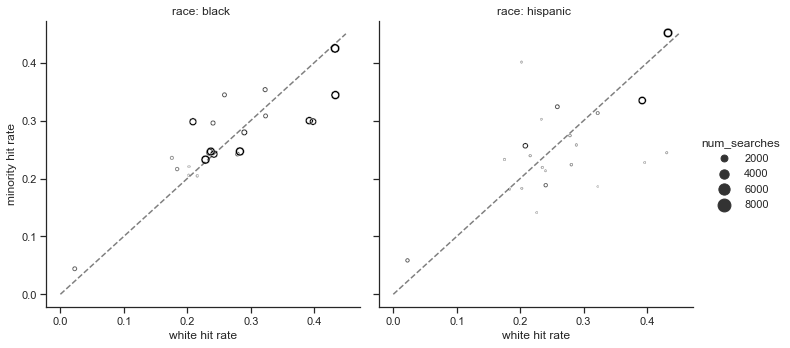

In [142]:
sns.set_style("ticks")
g = sns.relplot(data=df_final, x="white_hit_rate",
                y="minority_hit_rate",
                col="subject_race",
                color = 'black',
                size = 'num_searches',
                marker = '$\circ$',
                sizes = (10, 200)
                )

(g.set_axis_labels("white hit rate", "minority hit rate")
 .set_titles("race: {col_name} "))

xx = np.linspace(0, 0.45, 100)
yy = xx
for ax in g.axes.flat:
    ax.plot(xx,yy, color = 'black', linestyle = '--', alpha = 0.5)